<a href="https://colab.research.google.com/github/GKurek94/Data-Science-projects/blob/main/Insurance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib
import plotly.express as px

In [2]:
df_raw = pd.read_csv('insurance.csv')
df_raw

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [3]:
df_raw.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [4]:
df_raw.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [5]:
df = df_raw[(df_raw['children']==0)]
df.describe()

,age,bmi,children,charges
count,574.000000,574.000000,574.0,574.000000
mean,38.444251,30.550296,0.0,12365.975602
std,16.436228,6.039106,0.0,12023.293942
min,18.000000,15.960000,0.0,1121.873900
25%,22.000000,26.143750,0.0,2734.421150
50%,36.000000,30.302500,0.0,9856.951900
75%,55.000000,34.746250,0.0,14440.123825
max,64.000000,53.130000,0.0,63770.428010


In [6]:
df.reset_index(drop=True)


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,33,male,22.705,0,no,northwest,21984.47061
2,32,male,28.880,0,no,northwest,3866.85520
3,31,female,25.740,0,no,southeast,3756.62160
4,60,female,25.840,0,no,northwest,28923.13692
...,...,...,...,...,...,...,...
569,23,female,33.400,0,no,southwest,10795.93733
570,18,female,31.920,0,no,northeast,2205.98080
571,18,female,36.850,0,no,southeast,1629.83350
572,21,female,25.800,0,no,southwest,2007.94500


In [7]:
low = df_raw['bmi']<18.5
correct = (df_raw['bmi'] > 19) & (df_raw['bmi'] < 24.9) 
high = (df_raw['bmi'] > 25) & (df_raw['bmi'] < 29.9) 
obesity = (df_raw['bmi'] > 30) & (df_raw['bmi'] < 34.9) 

low2 = df['bmi']<18.5
correct2 = (df['bmi'] > 19) & (df['bmi'] < 24.9) 
high2 = (df['bmi'] > 25) & (df['bmi'] < 29.9) 
obesity2 = (df['bmi'] > 30) & (df['bmi'] < 34.9) 

bmi_criteria = [low, low2, correct, correct2, high, high2, obesity, obesity2]
px.bar(x=["Low","Low_no_chld","Correct","Correct_no_chld","High","High_no_chld","Obesity","Obesity_no_chld"], y =[x.sum() for x in bmi_criteria], title="Liczba osób z różnym wskaźnikiem BMI wraz z porównaniem do osób nieposiadających dzieci z tej samej grupy badanych. ")

In [9]:
w = correct.sum()
w2 = correct2.sum()
round(w2/w,3)

0.438

### Powyższy wykres przedstawia korelacje między posiadaniem dzieci a rosnącym wskaźnikiem BMI. Z wykresu wynika, iż brak posiadania dzieci nie wpływa negatywnie na wskaźnik masy ciała, a relacja między danymi grupami jest w okolicach 40-50%.

In [ ]:
px.scatter_matrix(data_frame=df_raw, dimensions=['sex','age','bmi','children','charges'], color='smoker')

In [10]:
df23 = df_raw.groupby(['bmi','sex','children', 'smoker'])[['charges']].mean()
df23

charges
bmi    sex    children smoker             
15.960 male   0        no       1694.79640
16.815 female 1        no       3167.45585
       male   2        no       6640.54485
17.195 female 2        yes     14455.64405
17.290 female 0        no       3732.62510
...                                    ...
48.070 female 2        no       9432.92530
49.060 male   0        no      11381.32540
50.380 male   1        no       2438.05520
52.580 male   1        yes     44501.39820
53.130 male   0        no       1163.46270

[1193 rows x 1 columns]

##W tej części projektu będzie liniowa regresja linearna.


X_train shape: (410, 1)
X_test shape: (137, 1)
Y_train shape: (410, 1)
Y_test shape: (137, 1)


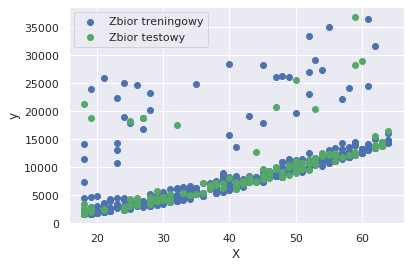

In [47]:
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()
X = dff['age'].values.reshape(-1,1)
Y = dff['charges'].values.reshape(-1,1)
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25)
print('X_train shape:', X_train.shape)
print('X_test shape:', X_test.shape)
print('Y_train shape:', y_train.shape)
print('Y_test shape:', y_test.shape)

plt.scatter(X_train, y_train, c='b', label='Zbior treningowy')
plt.scatter(X_test, y_test, c='g', label='Zbior testowy')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()


In [49]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X, Y)
print(lin_reg.coef_)
print(lin_reg.intercept_)

[[268.68881543]]
[-1902.24177156]


## Rozwiązaniem jest prosta o postaci: 
## y = -1902.24 + 268.69* x

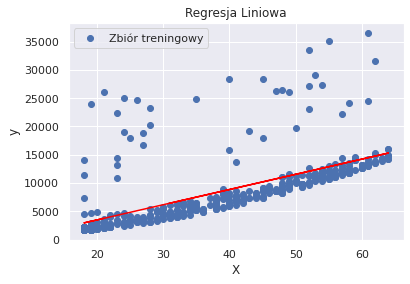

In [50]:
plt.title('Regresja Liniowa')
plt.scatter(X_train, y_train, c='b', label='Zbiór treningowy')
plt.plot(X, lin_reg.intercept_ + lin_reg.coef_[0] * X, c='red')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()

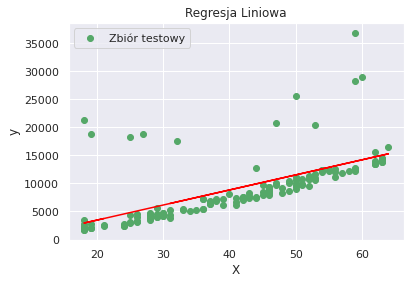

In [51]:
plt.title('Regresja Liniowa')
plt.scatter(X_test, y_test, c='g', label='Zbiór testowy')
plt.plot(X, lin_reg.intercept_ + lin_reg.coef_[0] * X, c='red')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()

In [52]:
lin_reg.score(X_test,y_test)

0.4041927180314313

## Wynik regresji liniowej wynosi 0.404, co nie jest najlepszym wynikiem. Zastosowanie regresji liniowej wielomianowej powinno polepszyć wyniki. 